In [54]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt2
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  
import graphviz
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from ggplot import *
import pydotplus

from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import metrics  
from sklearn.model_selection import train_test_split  


In [55]:
# Import data

mp  = pd.read_csv('/Users/Felicia/Documents/Felicia Zhang/Felicia/Princeton/ConsultingClub/Mindprint/Mindprint_SATScores.csv')
mp.set_index('customer_id', inplace=True)

print('Data size:',len(mp), 'rows') 

Data size: 85 rows


In [56]:
mp.head()

,completed_at,age,gender,SM_Sz,SM_SCORE,VMEM_Az,VMEM_Sz,VMEM_SCORE,VMEM_eff,ABF_Az,...,REVERSALS,DYSLEXIA,ADHD,ADHD_MEDICATION,ANXIETY,DEPRESSION,SATVersion,ReadingScaledScore,WritingScaledScore,MathScaledScore
customer_id,,,,,,,,,,,,,,,,,,,,,
452,2015-08-03 16:01,15,male,0.7031,high_expected,0.6298,-0.1906,high_expected,0.21960,1.0630,...,6,0,0,NO,0,0,SAT-5,35,31,27
5461,2018-02-16 17:56,17,female,1.1866,medium_strength,0.6250,0.6169,high_expected,0.62095,1.8202,...,6,0,0,NO,0,0,SAT-2,35,36,32
5461,2018-02-16 17:56,17,female,1.1866,medium_strength,0.6250,0.6169,high_expected,0.62095,1.8202,...,6,0,0,NO,0,0,SAT-4,32,38,34
5461,2018-02-16 17:56,17,female,1.1866,medium_strength,0.6250,0.6169,high_expected,0.62095,1.8202,...,6,0,0,NO,0,0,SAT-7,37,37,34
5461,2018-02-16 17:56,17,female,1.1866,medium_strength,0.6250,0.6169,high_expected,0.62095,1.8202,...,6,0,0,NO,0,0,SAT-5,35,36,33


In [57]:
# Label students who received extra time: 2507 (don't have data), 2421, 4499, 6150, 517, 2010, 2948, 6171, 5866, 4967, 2720, 1872, 6808
mp['ExtraTime'] = 0

#mp.loc[2421, 'ExtraTime'] = 1
#mp.loc[4499, 'ExtraTime'] = 1
#mp.loc[6150, 'ExtraTime'] = 1
#mp.loc[517, 'ExtraTime'] = 1
#mp.loc[2010, 'ExtraTime'] = 1
#mp.loc[2948, 'ExtraTime'] = 1
#mp.loc[6171, 'ExtraTime'] = 1
#mp.loc[5866, 'ExtraTime'] = 1
#mp.loc[4967, 'ExtraTime'] = 1
#mp.loc[2720, 'ExtraTime'] = 1
#mp.loc[1872, 'ExtraTime'] = 1
#mp.loc[6808, 'ExtraTime'] = 1
#mp.loc[8568, 'ExtraTime'] = 1
#mp.loc[10266, 'ExtraTime'] = 1
#mp.loc[8409, 'ExtraTime'] = 1

#print('Number of students who received extra time:',len(mp.loc[mp['ExtraTime'] == 1]))

In [1]:
# Replace outlier Mindprint scores (accuracy scores with < -2 with NAN)
# 1901: WM_Az, 5143: ATT_Az, 1902: ATT_Az, 6381: ATT_Az

#print(mp.loc[1901, 'WM_Az'], mp.loc[5143, 'ATT_Az'], mp.loc[1902, 'ATT_Az'], mp.loc[6381, 'ATT_Az'])

mp.loc[10032, 'WM_Az'] = np.nan
#mp.loc[5143, 'ATT_Az'] = -2
#mp.loc[1902, 'ATT_Az'] = -2
#mp.loc[6381, 'ATT_Az'] = -2

#print(mp.loc[10032, 'WM_Az'])

NameError: name 'mp' is not defined

In [59]:
# Remove students that having missing ACT subject scores

print('Number of students with missing ACT subject scores:',len(mp) - len(mp.dropna(subset=['MathScaledScore','ReadingScaledScore','WritingScaledScore']))) 
mp = mp.dropna(subset=['ReadingScaledScore','WritingScaledScore','MathScaledScore']) 

Number of students with missing ACT subject scores: 0


In [60]:
# Calculate descriptive statistics

mp.describe().round(1)

,age,SM_Sz,VMEM_Az,VMEM_Sz,VMEM_eff,ABF_Az,ABF_Sz,ABF_eff,LAN_Az,LAN_Sz,...,PROCESSING_SPEED_Sz,REVERSALS,DYSLEXIA,ADHD,ANXIETY,DEPRESSION,ReadingScaledScore,WritingScaledScore,MathScaledScore,ExtraTime
count,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,...,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0
mean,16.2,0.8,0.4,0.3,0.3,0.3,0.1,0.2,0.6,0.3,...,-0.0,3.8,0.1,0.1,0.1,0.1,29.7,31.0,30.0,0.0
std,0.7,0.5,0.6,0.6,0.5,1.1,0.9,0.7,0.4,0.9,...,0.4,2.6,0.3,0.4,0.5,0.3,4.0,4.0,3.7,0.0
min,15.0,-0.4,-2.8,-1.4,-1.1,-3.5,-3.1,-2.0,-1.0,-3.4,...,-0.8,0.0,0.0,0.0,0.0,0.0,20.0,21.0,21.0,0.0
25%,16.0,0.6,0.3,0.0,0.1,-0.1,-0.4,0.0,0.2,-0.2,...,-0.3,2.0,0.0,0.0,0.0,0.0,27.0,28.0,27.0,0.0
50%,16.0,0.8,0.6,0.4,0.4,0.4,0.2,0.3,0.6,0.5,...,0.1,4.0,0.0,0.0,0.0,0.0,29.0,31.0,30.0,0.0
75%,17.0,1.1,1.0,0.7,0.6,1.0,0.7,0.7,1.0,1.0,...,0.2,6.0,0.0,0.0,0.0,0.0,32.0,33.0,33.0,0.0
max,18.0,1.5,1.0,1.3,1.1,1.8,1.7,1.3,1.1,1.3,...,0.8,13.0,2.0,2.0,2.0,2.0,37.0,38.0,39.0,0.0


In [45]:
# Only want the scaled subject scores

scores = mp.iloc[:,[-4,-3,-2,-1]]
scores.head()

,ReadingScaledScore,WritingScaledScore,MathScaledScore,ExtraTime
customer_id,,,,
452,35,31,27,0
5461,35,36,32,0
5461,32,38,34,0
5461,37,37,34,0
5461,35,36,33,0


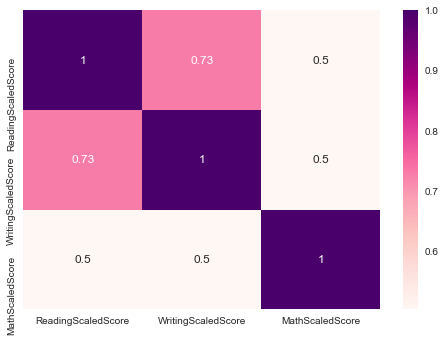

In [46]:
# Heatmap
# remove extratime column for the heatmap
scores2 = scores.drop('ExtraTime', 1)

fig = sns.heatmap(scores2.corr(),annot=True, cmap='RdPu')
plt2.show()

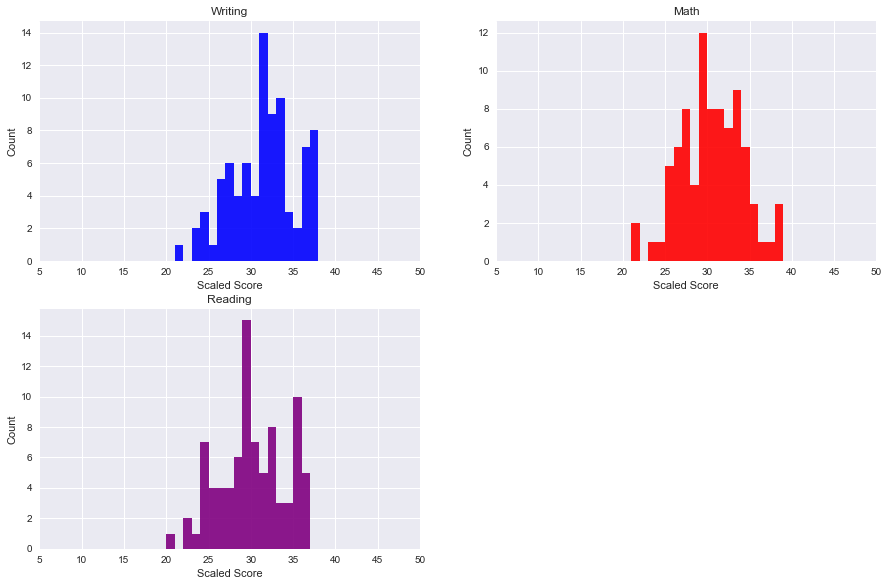

In [36]:
# Plot distribution of subject scores
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(321)
ax2 = fig1.add_subplot(322)
ax3 = fig1.add_subplot(323)

x = scores.loc[:,'WritingScaledScore']
n, bins, patches = ax1.hist(x, len(scores.WritingScaledScore.unique()), facecolor='blue', alpha=0.9)
ax1.set_title("Writing")
ax1.set_ylabel("Count")
ax1.set_xlabel("Scaled Score")
ax1.set_xlim(5,50,5)

x = scores.loc[:,'MathScaledScore']
n, bins, patches = ax2.hist(x, len(scores.MathScaledScore.unique()), facecolor='red', alpha=0.9)
ax2.set_title("Math")
ax2.set_ylabel("Count")
ax2.set_xlabel("Scaled Score")
ax2.set_xlim(5,50,5)

x = scores.loc[:,'ReadingScaledScore']
n, bins, patches = ax3.hist(x, len(scores.ReadingScaledScore.unique()), facecolor='purple', alpha=0.9)
ax3.set_title("Reading")
ax3.set_ylabel("Count")
ax3.set_xlabel("Scaled Score")
ax3.set_xlim(5,50,5)

plt.show()

# Tree Model

In [11]:
###### Plan ######
# Use regression tree, 
# combine speed, accuracy and efficiency together
# Instead of trying to control tree depth, set sample split to 20 and 10

In [47]:
# drop processing speed
mp = mp.drop('PROCESSING_SPEED_Sz', axis=1) 

## Reading - All subjects

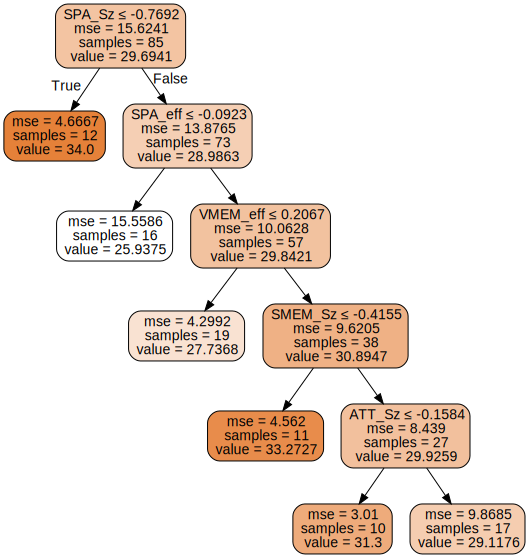

In [48]:
# load data
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz|_EFFICIENCY|_eff')].copy()
y = scores.loc[:, 'ReadingScaledScore'].copy()
  
# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

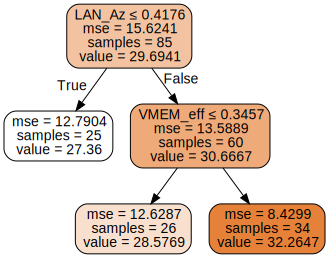

In [49]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Math 

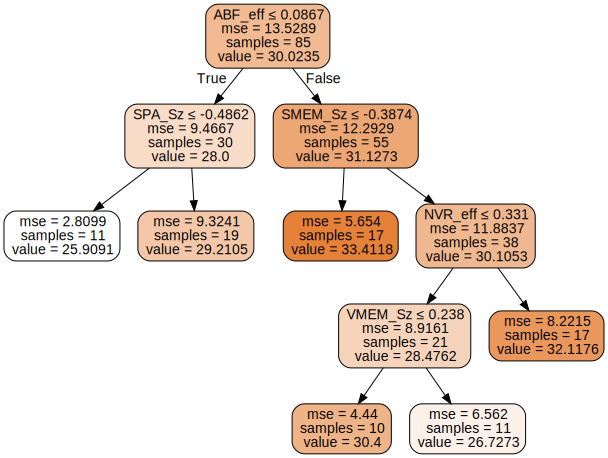

In [50]:
# load data
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz|_EFFICIENCY|_eff')].copy()
y = scores.loc[:, 'MathScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

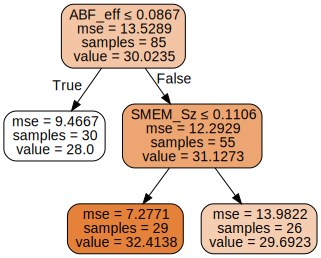

In [51]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Writing

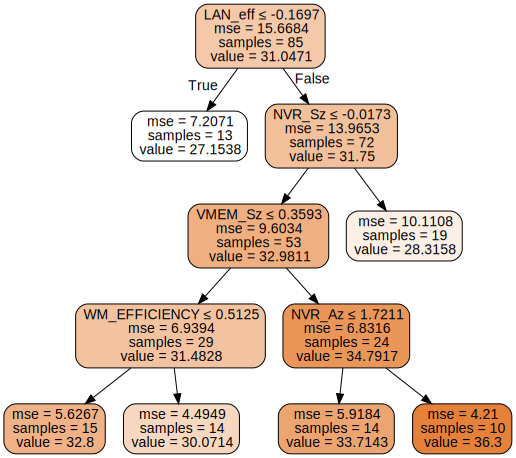

In [52]:
# load data
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz|_EFFICIENCY|_eff')].copy()
y = scores.loc[:, 'WritingScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

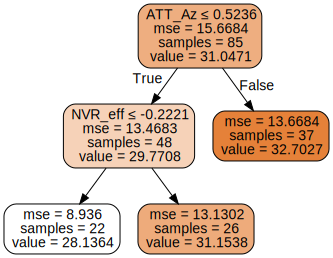

In [53]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph